In [14]:
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import math

In [2]:
class NaiveBayes():
    """
    The Gaussian Naive Bayes classifier. 
    
    Attributes
    ----------
    
    None
    
    Methods
    -------
    
    fit(self, X, y)
        Calculating mean and varience columnwise for particular a particular class
        
    _calculate_likelihood(self, mean, var, x)
        Gaussian likelihood of the data x given mean and var
        
    _calculate_prior(self, c)
        Calculate the prior of class c
        (samples where class == c / total number of samples)
        
    _classify(self, sample)
        Classification using Bayes Rule P(Y|X) = P(X|Y)*P(Y)/P(X),
        or Posterior = Likelihood * Prior / Scaling Factor
    """
    
    def fit(self, X, y):
        '''
        Calculating mean and varience columnwise for particular a particular class
        
        Attributes
        ----------
        
        X: ndarray
            input
        
        y: ndarray
            output
        
        '''
        
        self.X, self.y = X, y
        self.classes = np.unique(y)
        self.parameters = []
        # Calculate the mean and variance of each feature for each class
        for i, c in enumerate(self.classes):
            # Only select the rows where the label equals the given class
            X_where_c = X[np.where(y == c)]
            self.parameters.append([])
            # Add the mean and variance for each feature (column)
            for col in X_where_c.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)

    def _calculate_likelihood(self, mean, var, x):
        """ 
        Gaussian likelihood of the data x given mean and var 
        
        Attributes
        ----------
        
        mean: ndarray
            columnwise mean
            
        var: ndarray
            columnwise var
        """
        
        eps = 1e-4 # Added in denominator to prevent division by zero
        coeff = 1.0 / math.sqrt(2.0 * math.pi * var + eps)
        exponent = math.exp(-(math.pow(x - mean, 2) / (2 * var + eps)))
        return coeff * exponent

    def _calculate_prior(self, c):
        """
        Calculate the prior of class c (samples where class == c / total number of samples)
        
        Attributes
        ----------
        
        c: int
            respective class
        """
        
        frequency = np.mean(self.y == c)
        return frequency
    
    def get_accuracy(self,y,preds):
        '''
        function to get accuracy
        
        Attributes
        ----------
        
        y: ndarray
            output
        
        preds: ndarray
            predicted output
        '''
        
        preds_val=[]
        correct=0
        incorrect=0
        for i in range(len(preds)):
            if(preds[i] ==y[i]):
                correct +=1
            else:
                incorrect +=1
        return correct,incorrect 

    def _classify(self, sample):
        """ 
        Classification using Bayes Rule P(Y|X) = P(X|Y)*P(Y)/P(X),
        or Posterior = Likelihood * Prior / Scaling Factor
        P(Y|X) - The posterior is the probability that sample x is of class y given the
                 feature values of x being distributed according to distribution of y and the prior.
        P(X|Y) - Likelihood of data X given class distribution Y.
                 Gaussian distribution (given by _calculate_likelihood)
        P(Y)   - Prior (given by _calculate_prior)
        P(X)   - Scales the posterior to make it a proper probability distribution.
                 This term is ignored in this implementation since it doesn't affect
                 which class distribution the sample is most likely to belong to.
        Classifies the sample as the class that results in the largest P(Y|X) (posterior)
        
        Attributes
        ----------
        
        samples: ndarray
            individual rows of x_test for classification
            
        Methods
        -------
        
        _calculate_prior(self, c)
            Calculate the prior of class c (samples where class == c / total number of samples)
            
        
        _calculate_likelihood(self, mean, var, x)
            Gaussian likelihood of the data x given mean and var 
        """
        
        posteriors = []
        # Go through list of classes
        for i, c in enumerate(self.classes):
            # Initialize posterior as prior
            posterior = self._calculate_prior(c)
            # Naive assumption (independence):
            # P(x1,x2,x3|Y) = P(x1|Y)*P(x2|Y)*P(x3|Y)
            # Posterior is product of prior and likelihoods (ignoring scaling factor)
            for feature_value, params in zip(sample, self.parameters[i]):
                # Likelihood of feature value given distribution of feature values given y
                likelihood = self._calculate_likelihood(params["mean"], params["var"], feature_value)
                posterior *= likelihood
            posteriors.append(posterior)
        # Return the class with the largest posterior probability
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        """ Predict the class labels of the samples in X """
        y_pred = [self._classify(sample) for sample in X]
        return y_pred

For Data 8

In [9]:
url = 'https://github.com/fullmetal915/full2/blob/main/data8.csv?raw=true'
df = pd.read_csv(url, header=None)
df = df[~(df == '?').any(axis=1)]

x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


# Add a column of ones to account for bias in train and test
x_train = np.hstack((np.ones((y_train.size,1)),x_train))
x_test  = np.hstack((np.ones((y_test.size,1)),x_test))

obj = NaiveBayes()
obj.fit(x_train, y_train)
y_pred = obj.predict(x_test)

correct,incorrect = obj.get_accuracy(y_test, y_pred)
acc = correct*100/(correct+incorrect)
print(acc)

95.71428571428571


In [10]:
y_pred

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1]

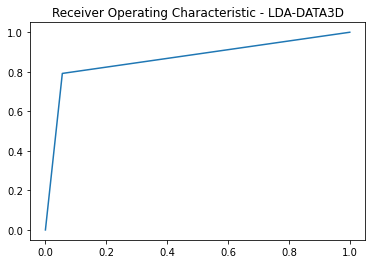

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate,threshold = roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic - LDA-DATA3D')
plt.plot(false_positive_rate, true_positive_rate)
plt.show()

In [16]:
url = 'https://github.com/fullmetal915/full2/blob/main/data9.csv?raw=true'
df = pd.read_csv(url, header=None)
df = df[~(df == '?').any(axis=1)]

x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


# Add a column of ones to account for bias in train and test
x_train = np.hstack((np.ones((y_train.size,1)),x_train))
x_test  = np.hstack((np.ones((y_test.size,1)),x_test))

obj = NaiveBayes()
obj.fit(x_train, y_train)
y_pred = obj.predict(x_test)

correct,incorrect = obj.get_accuracy(y_test, y_pred)
acc = correct*100/(correct+incorrect)
print(acc)

9.210526315789474


In [18]:
y_pred

[20,
 9,
 8,
 18,
 20,
 8,
 9,
 17,
 8,
 13,
 20,
 8,
 13,
 13,
 8,
 20,
 17,
 24,
 13,
 18,
 18,
 17,
 9,
 7,
 8,
 13,
 18,
 13,
 13,
 20,
 13,
 20,
 13,
 13,
 17,
 24,
 13,
 13,
 13,
 8,
 9,
 17,
 20,
 24,
 8,
 18,
 13,
 18,
 20,
 9,
 17,
 20,
 9,
 17,
 24,
 20,
 8,
 13,
 8,
 13,
 18,
 20,
 13,
 17,
 11,
 8,
 13,
 17,
 13,
 13,
 24,
 17,
 13,
 13,
 18,
 17]

For data 6

In [10]:
url = 'https://github.com/fullmetal915/full2/blob/main/data6.csv?raw=true'
df = pd.read_csv(url, header=None)
df = df[~(df == '?').any(axis=1)]

x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


# Add a column of ones to account for bias in train and test
x_train = np.hstack((np.ones((y_train.size,1)),x_train))
x_test  = np.hstack((np.ones((y_test.size,1)),x_test))

obj = NaiveBayes()
obj.fit(x_train, y_train)
y_pred = obj.predict(x_test)

correct,incorrect = obj.get_accuracy(y_test, y_pred)
acc = correct*100/(correct+incorrect)
print(acc)

85.71428571428571


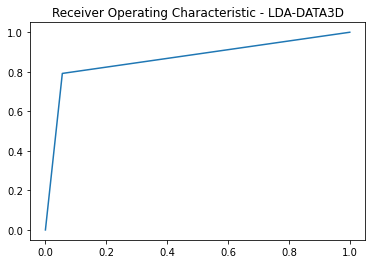

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate,threshold = roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic - LDA-DATA3D')
plt.plot(false_positive_rate, true_positive_rate)
plt.show()

For data 7

In [33]:
url = 'https://github.com/fullmetal915/full2/blob/main/data7.csv?raw=true'
df = pd.read_csv(url, header=None)
df = df[~(df == '?').any(axis=1)]

x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


# Add a column of ones to account for bias in train and test
x_train = np.hstack((np.ones((y_train.size,1)),x_train))
x_test  = np.hstack((np.ones((y_test.size,1)),x_test))

obj = NaiveBayes()
obj.fit(x_train, y_train)
y_pred = obj.predict(x_test)

correct,incorrect = obj.get_accuracy(y_test, y_pred)
acc = correct*100/(correct+incorrect)
print(acc)

90.14084507042253
